<a href="https://colab.research.google.com/github/Emanuelle-p/object_detection/blob/main/controle_de_acesso_de_ve%C3%ADculos_em_condom%C3%ADnios_utilizando_detec%C3%A7%C3%A3o_de_placas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Controle de acesso de veículos em condomínios utilizando detecção de placas**

Integrantes: Adriano Ferreira, Amir Yousself, Artur Matos, Bernardo Aires, Daired Almeida, Daniel Machado, Emanuelle Passos, Marcelo Henrique

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#OCR


##Tutorial Passo a Passo

### Installing the libraries

In [97]:
!sudo apt install tesseract-ocr
!pip install pytesseract 
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘tessdata’: File exists
--2023-06-01 04:29:18--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2023-06-01 04:29:18--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por

In [98]:
import cv2
import numpy as np
import imutils
import pytesseract
from matplotlib import pyplot as plt

In [99]:
def show_img(img):
  fig = plt.gcf()
  fig.set_size_inches(16, 8)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

### Pre-processing the image

In [138]:
img = cv2.imread('/content/drive/MyDrive/Programa K/Detecção de veículos e reconhecimento de placas/cars_dataset/images/Cars14.png')
(H, W) = img.shape[:2]
print(H, W)

225 400


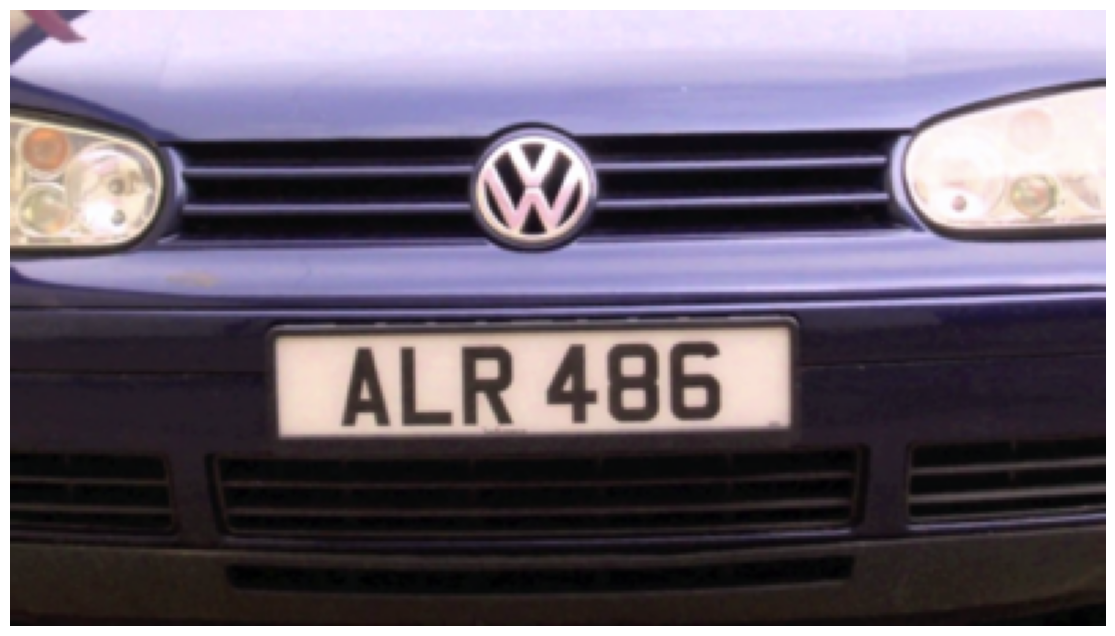

In [139]:
show_img(img)

### Grayscale

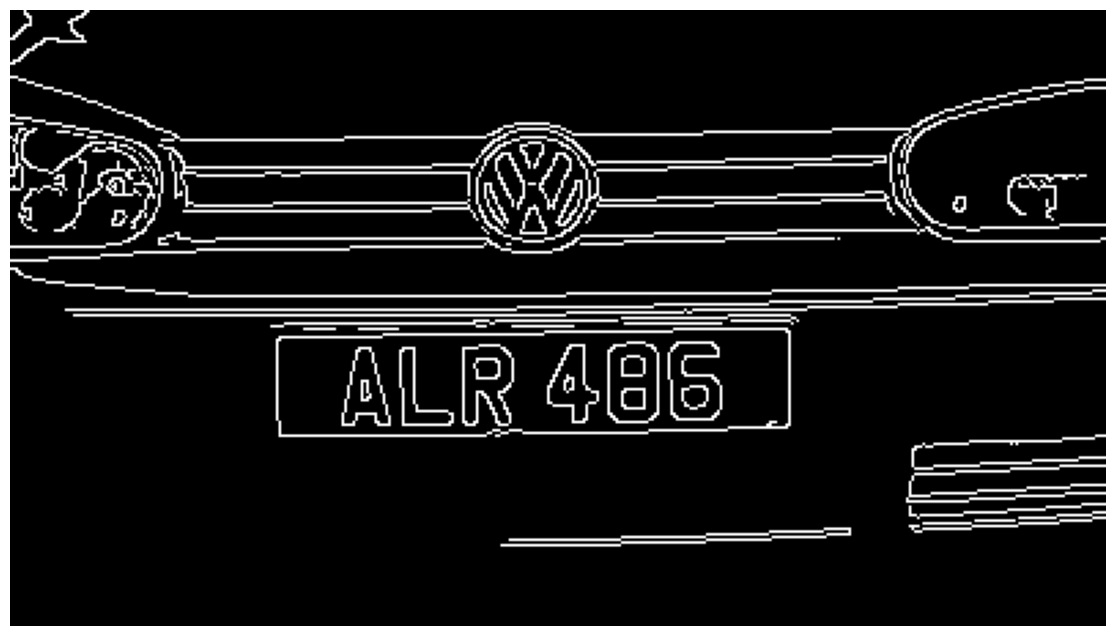

In [140]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(blur, 30, 200) 
show_img(edged)

Blur

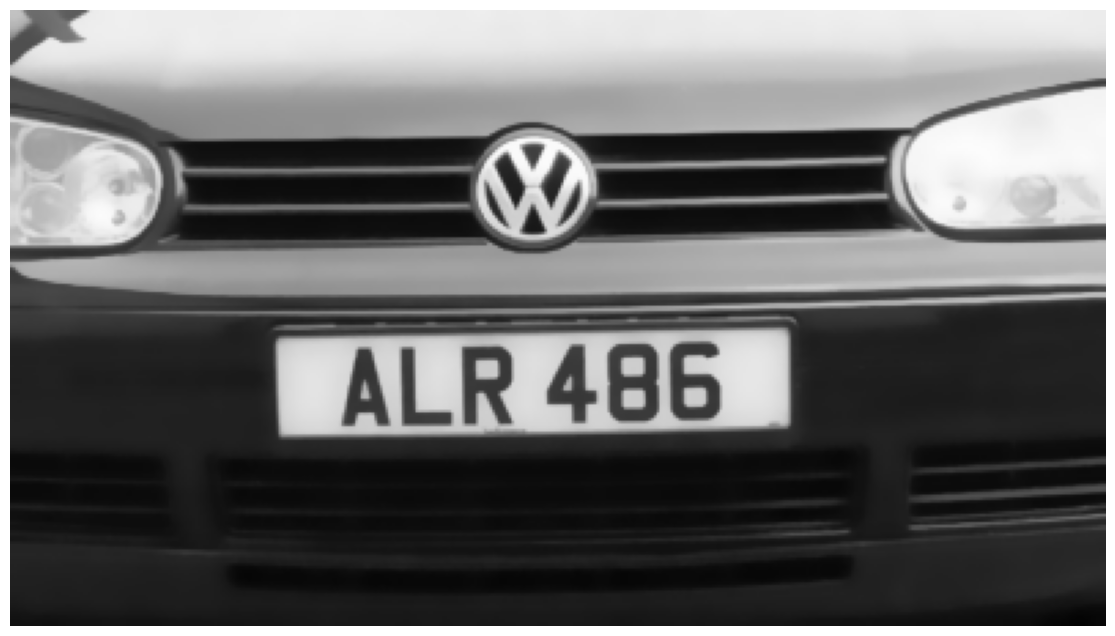

In [141]:
blur = cv2.bilateralFilter(gray, 11, 17, 17)
show_img(blur)

### Edges (Canny Edge)

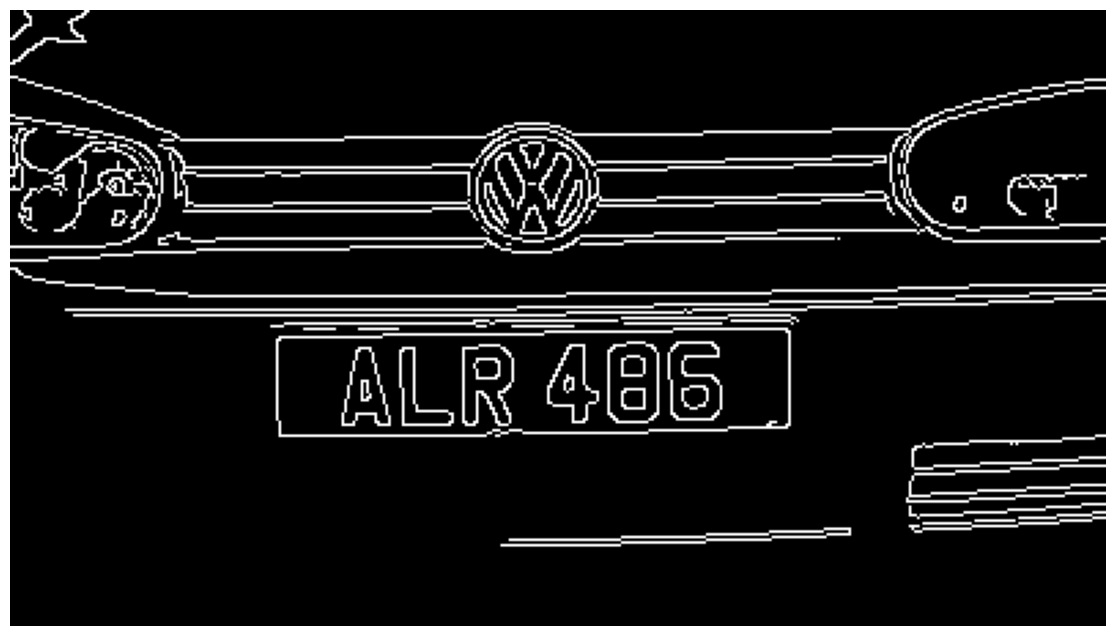

In [142]:
edged = cv2.Canny(blur, 30, 200) 
show_img(edged)

### Contours

In [143]:
conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
conts = imutils.grab_contours(conts) 
conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8] 

In [144]:
conts

[array([[[242, 116]],
 
        [[241, 117]],
 
        [[195, 117]],
 
        [[194, 118]],
 
        [[136, 118]],
 
        [[135, 119]],
 
        [[ 98, 119]],
 
        [[ 97, 120]],
 
        [[ 97, 149]],
 
        [[ 98, 150]],
 
        [[ 98, 155]],
 
        [[173, 155]],
 
        [[174, 154]],
 
        [[175, 154]],
 
        [[176, 153]],
 
        [[178, 153]],
 
        [[179, 154]],
 
        [[178, 155]],
 
        [[177, 155]],
 
        [[178, 155]],
 
        [[179, 154]],
 
        [[181, 154]],
 
        [[182, 153]],
 
        [[186, 153]],
 
        [[187, 154]],
 
        [[232, 154]],
 
        [[233, 153]],
 
        [[261, 153]],
 
        [[262, 152]],
 
        [[283, 152]],
 
        [[284, 151]],
 
        [[284, 117]],
 
        [[283, 116]]], dtype=int32),
 array([[[241, 117]],
 
        [[242, 116]],
 
        [[282, 116]],
 
        [[284, 118]],
 
        [[284, 150]],
 
        [[282, 152]],
 
        [[278, 152]],
 
        [[277, 151]],
 
   

### Finding the region

In [145]:
location = None
for c in conts:
    peri = cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
    if cv2.isContourConvex(aprox):
      if len(aprox) == 4:
          location = aprox
          break

In [146]:
location

array([[[284, 117]],

       [[ 98, 119]],

       [[ 98, 155]],

       [[283, 152]]], dtype=int32)

In [147]:
mask = np.zeros(gray.shape, np.uint8) 

In [148]:
mask.shape

(225, 400)

In [149]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

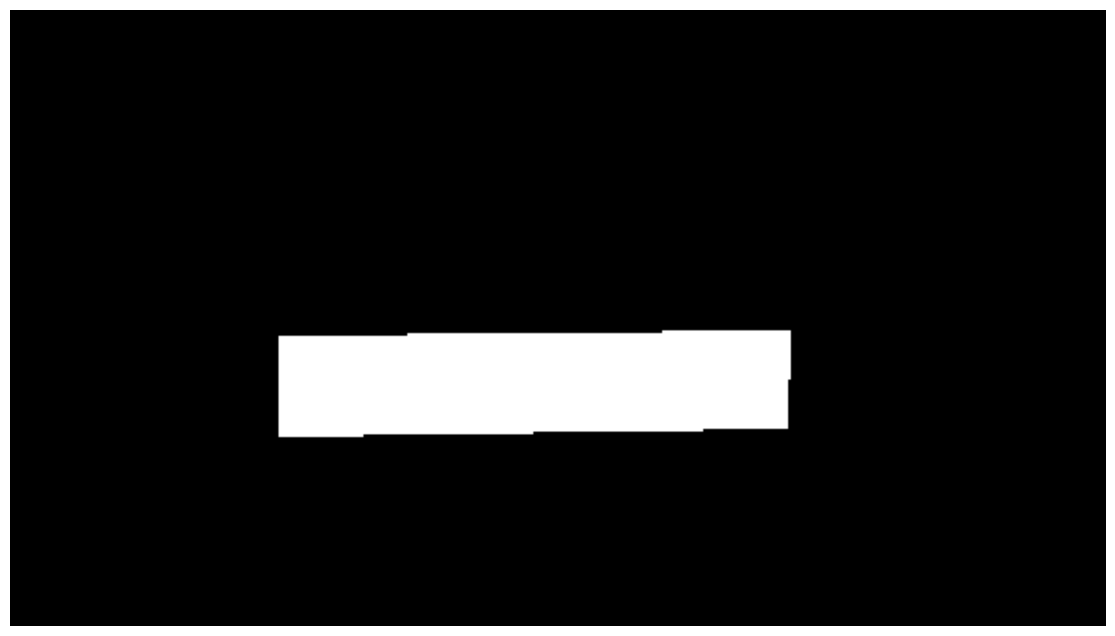

In [150]:
img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
show_img(mask)

In [151]:
img_plate = cv2.bitwise_and(img, img, mask=mask)

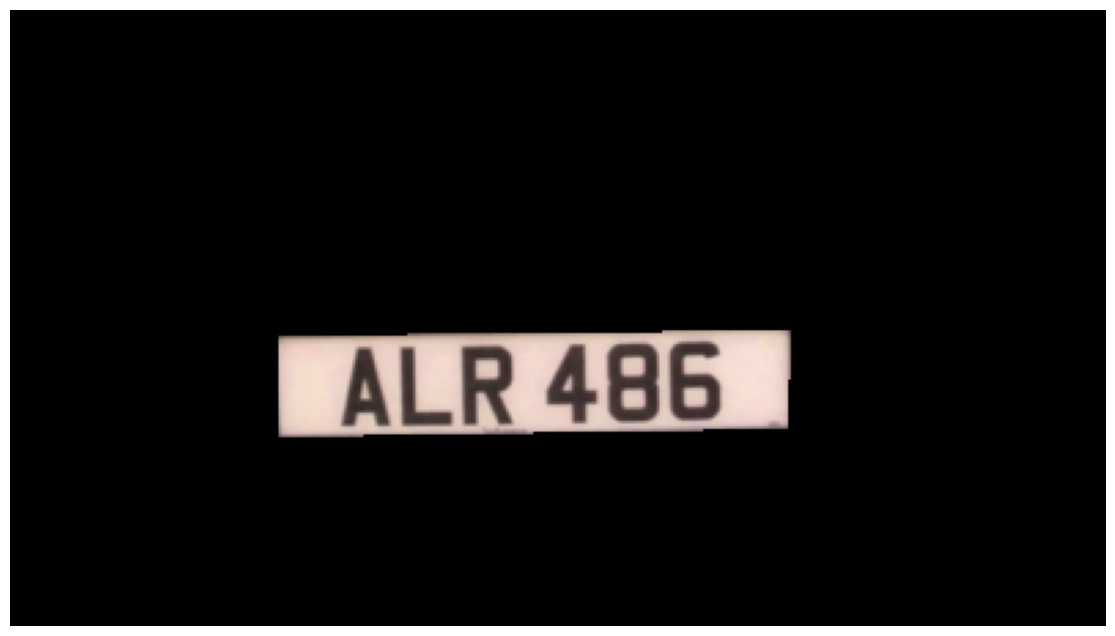

In [152]:
show_img(img_plate)

In [153]:
(y, x) = np.where(mask==255)
(beginX, beginY) = (np.min(x), np.min(y))
(endX, endY) = (np.max(x), np.max(y))

In [154]:
beginX, beginY, endX, endY

(98, 117, 284, 155)

In [155]:
plate = gray[beginY:endY, beginX:endX]

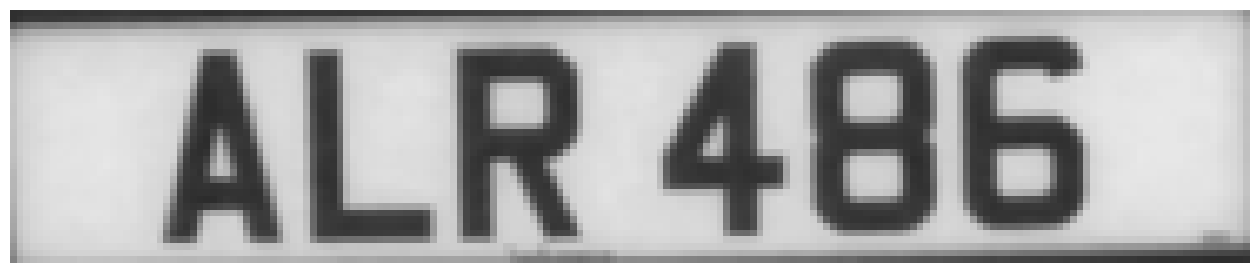

In [156]:
show_img(plate)

### Text recognition

In [157]:
config_tesseract = "--tessdata-dir tessdata --psm 6"

In [158]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [159]:
text = pytesseract.image_to_string(plate, lang="por", config=config_tesseract)
print(text)

ALR 486



In [160]:
text

'ALR 486\n\x0c'

In [161]:
text = "".join(character for character in text if character.isalnum())
text

'ALR486'

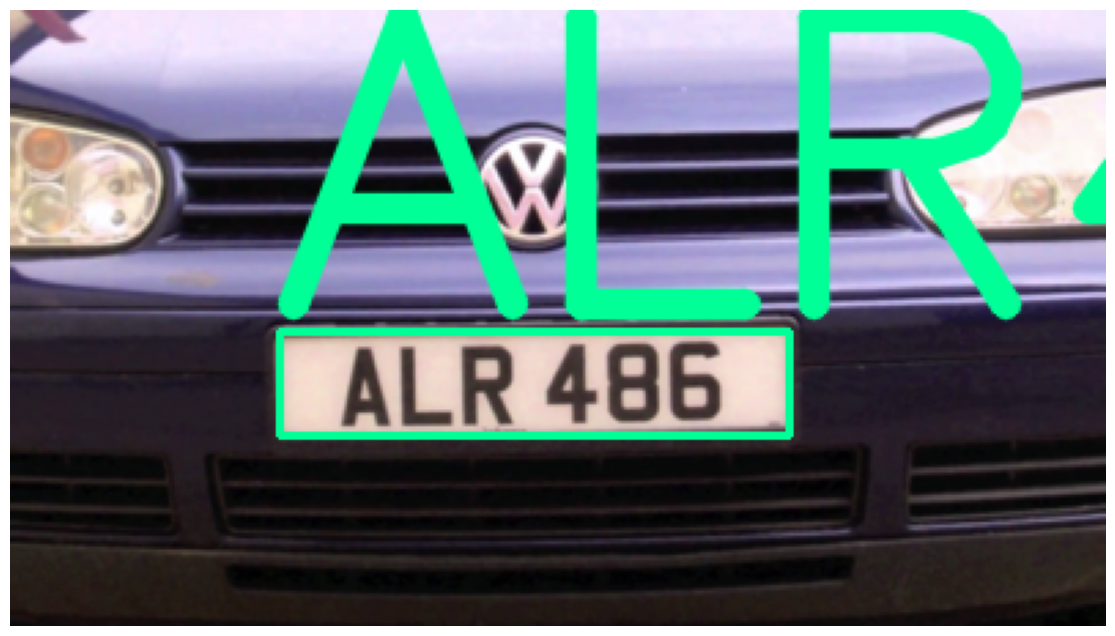

In [162]:
img_final = cv2.putText(img, text, (beginX, beginY - 10), cv2.FONT_HERSHEY_SIMPLEX, 5, (150,255,0), 10, lineType=cv2.LINE_AA)
img_final = cv2.rectangle(img, (beginX, beginY), (endX, endY), (150, 255, 0), 2)
show_img(img_final)

## Functions

In [163]:
def detect_plate(file_img):
  img = cv2.imread(file_img)
  (H, W) = img.shape[:2]
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.bilateralFilter(gray, 11, 17, 17)
  edged = cv2.Canny(blur, 30, 200)
  show_img(edged)
  conts = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
  conts = imutils.grab_contours(conts) 
  conts = sorted(conts, key=cv2.contourArea, reverse=True)[:8] 

  location = None
  for c in conts:
    peri = cv2.arcLength(c, True)
    aprox = cv2.approxPolyDP(c, 0.02 * peri, True)
    if cv2.isContourConvex(aprox):
      if len(aprox) == 4:
          location = aprox
          break

  beginX = beginY = endX = endY = None
  if location is None:
    plate = False
  else:
    mask = np.zeros(gray.shape, np.uint8) 

    img_plate = cv2.drawContours(mask, [location], 0, 255, -1)
    img_plate = cv2.bitwise_and(img, img, mask=mask)

    (y, x) = np.where(mask==255)
    (beginX, beginY) = (np.min(x), np.min(y))
    (endX, endY) = (np.max(x), np.max(y))

    plate = gray[beginY:endY, beginX:endX]
    show_img(plate)

  return img, plate, beginX, beginY, endX, endY

In [164]:
def ocr_plate(plate):
  config_tesseract = "--tessdata-dir tessdata --psm 6"
  text = pytesseract.image_to_string(plate, lang="por", config=config_tesseract)
  text = "".join(c for c in text if c.isalnum())
  return text

In [165]:
def recognize_plate(file_img):
  img, plate, beginX, beginY, endX, endY = detect_plate(file_img)
  
  if plate is False:
    print("It was not possible to detect!")
    return 0

  text = ocr_plate(plate)
  print(text)
  img_final = cv2.putText(img, text, (beginX, beginY - 10), cv2.FONT_HERSHEY_SIMPLEX, 5, (150,255,0), 10, lineType=cv2.LINE_AA)
  img = cv2.rectangle(img, (beginX, beginY), (endX, endY), (150, 255, 0), 2)
  show_img(img)

  return img, plate

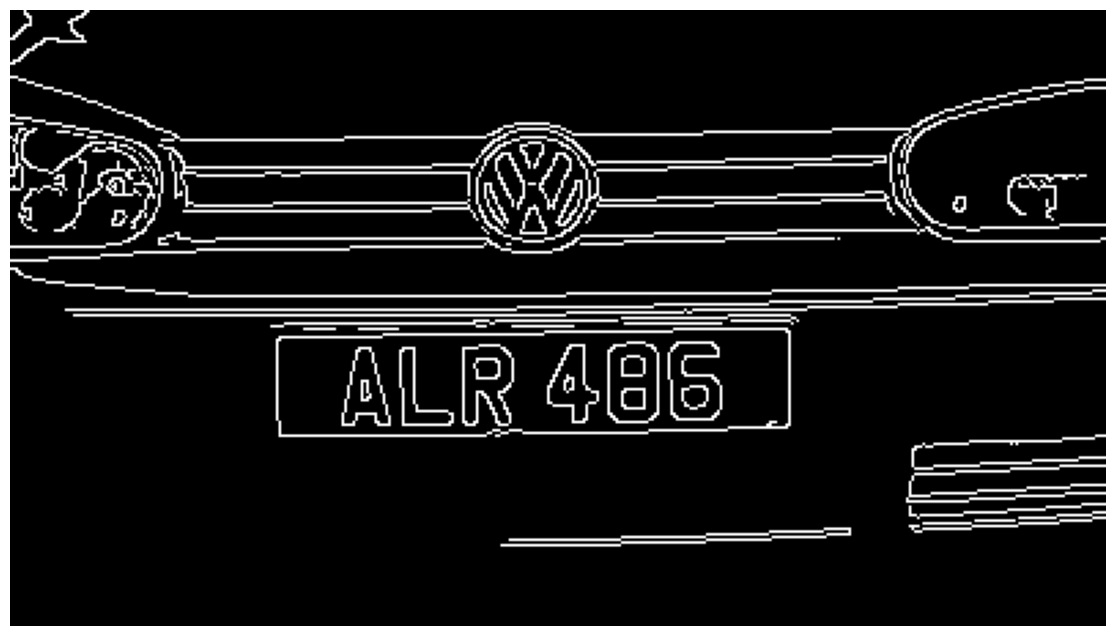

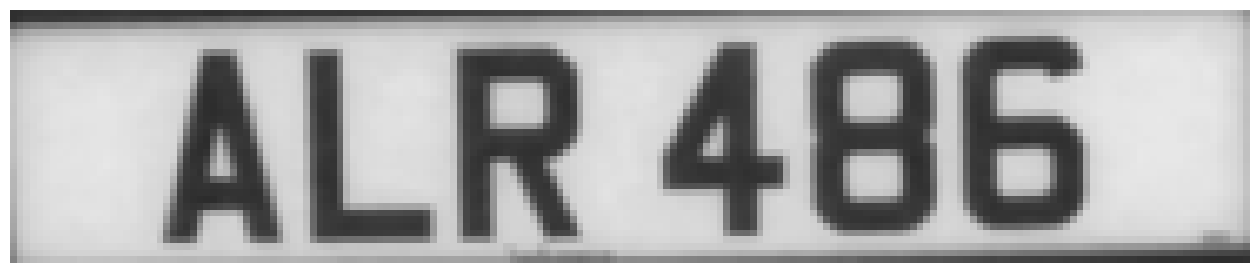

ALR486


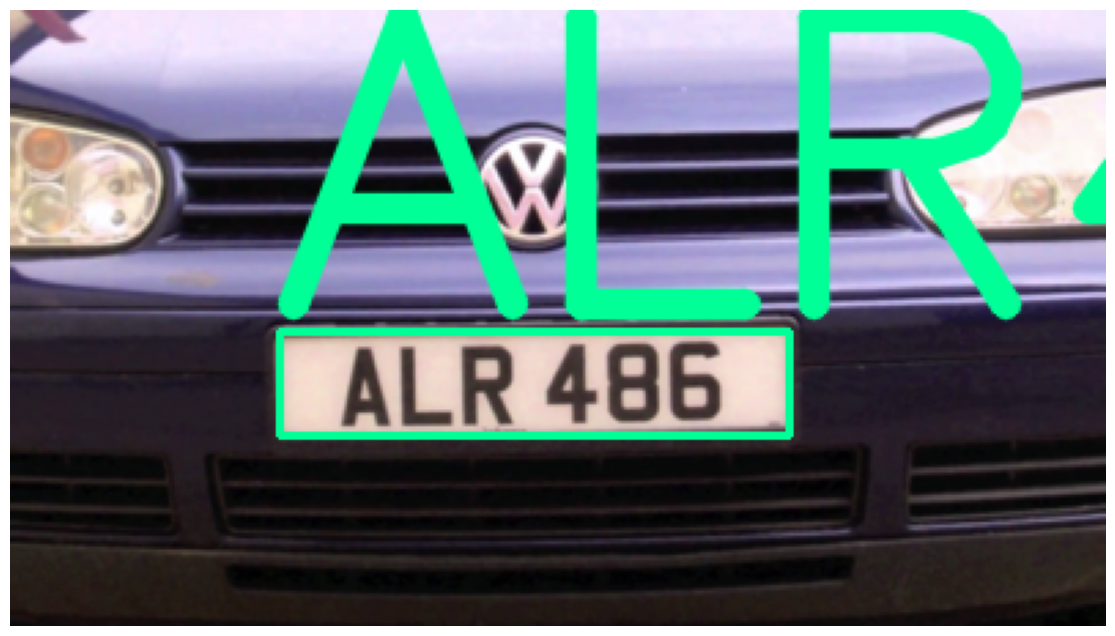

In [166]:
img, plate = recognize_plate('/content/drive/MyDrive/Programa K/Detecção de veículos e reconhecimento de placas/cars_dataset/images/Cars14.png')

## Veículo desejado para verificação

In [167]:
def preprocessing(img):
  increase = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_CUBIC)
  value, otsu = cv2.threshold(increase, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
  return otsu

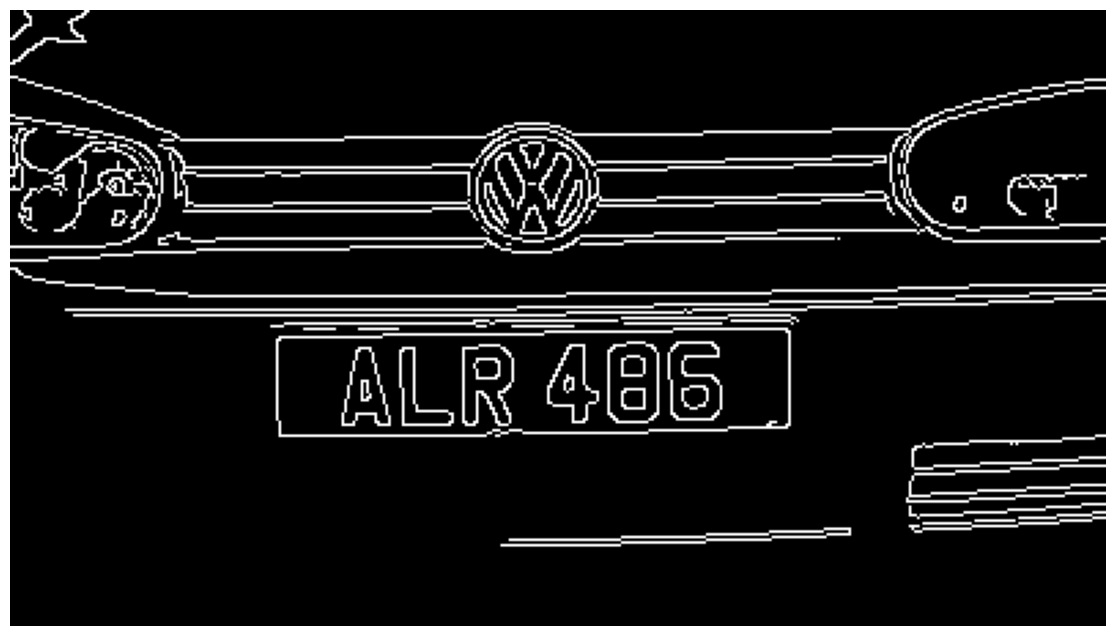

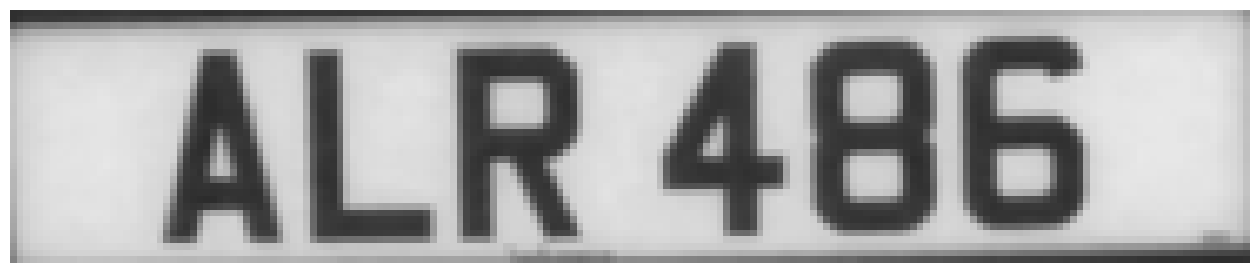

ALR486


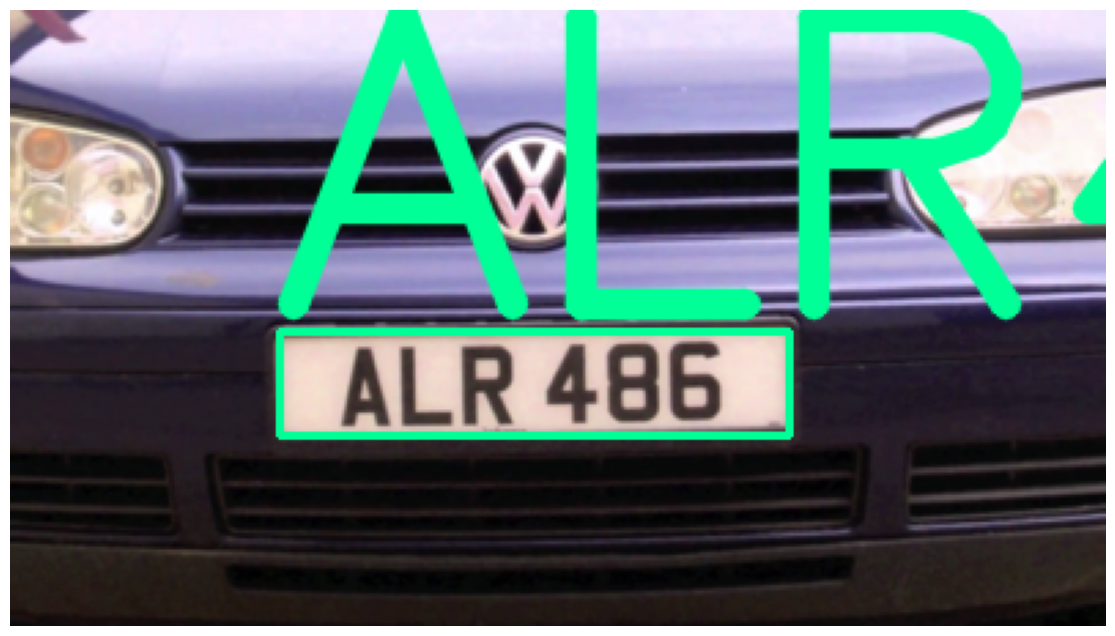

In [168]:
img, plate = recognize_plate('/content/drive/MyDrive/Programa K/Detecção de veículos e reconhecimento de placas/cars_dataset/images/Cars14.png')

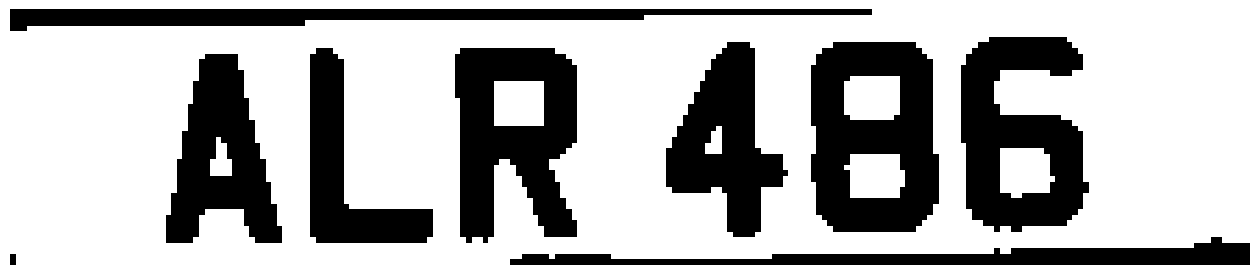

ALR486


In [169]:
processed_plate = preprocessing(plate)
show_img(processed_plate)
text = ocr_plate(processed_plate)
print(text)

# Creating the database

In [170]:
import sqlite3
import threading
import time

# Conectando ao banco de dados
conn = sqlite3.connect('banco_de_dados.db')
cursor = conn.cursor()

# Criando a tabela "moradores"
cursor.execute('''
    CREATE TABLE IF NOT EXISTS moradores (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        nome TEXT,
        placa TEXT
    )
''')

# Criando a tabela "visitantes"
cursor.execute('''
    CREATE TABLE IF NOT EXISTS visitantes (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        nome TEXT,
        id_permissao TEXT,
        placa TEXT,
        tipo TEXT
    )
''')

# Fechando a conexão com o banco de dados
conn.close()


In [171]:
#Funcoes do banco de dados de moradores e visitantes

def adiciona_morador(nome1, placa1):
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()

  nome = nome1
  placa = placa1
  cursor.execute("INSERT INTO moradores (nome, placa) VALUES (?, ?)", (nome, placa))

  conn.commit()
  conn.close()

def adiciona_visitante(nome1, id_permissao1, placa1, tipo1):
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()

  nome = nome1
  id_permissao = id_permissao1
  placa = placa1
  tipo = tipo1

  cursor.execute("INSERT INTO visitantes (nome, id_permissao, placa, tipo) VALUES (?, ?, ?, ?)", (nome, id_permissao, placa, tipo))

  conn.commit()
  conn.close()

  if tipo == 'entrega' or tipo =='Entrega' or tipo == 'Entregador':
    t = threading.Timer(10, apaga_visitante, args=(cursor.lastrowid,))
    t.start()

  elif tipo == 'amigo' or tipo == 'Amigo':
    t = threading.Timer(20, apaga_visitante, args=(cursor.lastrowid,))
    t.start()
  

def ler_morador():
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()  

  cursor.execute("SELECT * FROM moradores")
  rows = cursor.fetchall()  
  
  print("{:<5} {:<10}".format(" ","MORADORES"))

  print("{:<3} | {:<10} | {:<10}".format("ID", "Nome", "Placa"))
  print("---------------------------------------")
    
  for row in rows:
    print("{:<3} | {:<10} | {:<10}".format(row[0], row[1], row[2]))
  
  print("\n")

  conn.close()

def ler_visitante():
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()

  cursor.execute("SELECT * FROM visitantes")
  rows = cursor.fetchall()

  print("{:<17} {:<10}".format(" ","VISITANTES"))

  print("{:<5} | {:<10} | {:<5} | {:<10} | {:<10}".format("ID", "Nome", "ID_L", "Placa","Tipo"))
  print("-------------------------------------------------------------")
    
  for row in rows:
    print("{:<3} | {:<10} | {:<5} | {:<10} | {:<10}".format(row[0], row[1], row[2], row[3], row[4]))

  conn.close()

def ler():
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()  

  cursor.execute("SELECT * FROM moradores")
  rows = cursor.fetchall()

  print("{:<5} {:<10}".format(" ","MORADORES"))

  print("{:<3} | {:<10} | {:<10}".format("ID", "Nome", "Placa"))
  print("---------------------------------------")
    
  for row in rows:
    print("{:<3} | {:<10} | {:<10}".format(row[0], row[1], row[2]))
  
  print("\n")

  cursor.execute("SELECT * FROM visitantes")
  rows = cursor.fetchall()

  print("{:<17} {:<10}".format(" ","VISITANTES"))

  print("{:<5} | {:<10} | {:<5} | {:<10} | {:<10}".format("ID", "Nome", "ID_L", "Placa","Tipo"))
  print("-------------------------------------------------------------")
    
  for row in rows:
    print("{:<3} | {:<10} | {:<5} | {:<10} | {:<10}".format(row[0], row[1], row[2], row[3], row[4]))

  conn.close()

def apaga_morador(id):
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()

  id_temporario = id

  cursor.execute("DELETE FROM moradores WHERE id=?", (id_temporario,))

  conn.commit()
  conn.close()

def apaga_visitante(id):
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()

  id_temporario = id

  cursor.execute("DELETE FROM visitantes WHERE id=?", (id_temporario,))

  conn.commit()
  conn.close()

def encontra_placa_morador(placa):
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()

  cursor.execute("SELECT * FROM moradores WHERE placa=?", (placa,))
  resultado = cursor.fetchone()

  conn.close()
  
  if resultado == None:
    return print("PLACA NAO ENCONTRADA\nACESSO NEGADO")
  else:
    return print("BEM VINDO",resultado[1],"\nACESSO LIBERADO")

def encontra_placa_visitante(placa):
  conn = sqlite3.connect('banco_de_dados.db')
  cursor = conn.cursor()

  cursor.execute("SELECT * FROM visitantes WHERE placa=?", (placa,))
  resultado = cursor.fetchone()

  conn.close()

  if resultado == None:
    return print("PLACA NAO ENCONTRADA\nACESSO NEGADO")
  else:
    return print("BEM VINDO",resultado[1],"\nACESSO LIBERADO")

def apaga_todos_moradores():
    conn = sqlite3.connect('banco_de_dados.db')
    cursor = conn.cursor()

    cursor.execute("DELETE FROM moradores")

    conn.commit()
    conn.close()

def apaga_todos_visitantes():
    conn = sqlite3.connect('banco_de_dados.db')
    cursor = conn.cursor()

    cursor.execute("DELETE FROM visitantes")

    conn.commit()
    conn.close()

In [172]:
encontra_placa_morador(text)

PLACA NAO ENCONTRADA
ACESSO NEGADO


In [173]:
#Para preencher a tabela automaticamente
#(nao e nescessario para rodar o codigo, pode preencher manualmente tbm)

conn = sqlite3.connect('banco_de_dados.db')
cursor = conn.cursor()

nome_mora = ['Marcelo','Emanuelle','Artur','Morador 4','Morador 5','Morador 6','Morador 7','Morador 8','Morador 9','Morador 10','Morador 11','Morador 12','Morador 13','Morador 14','Morador 15','Morador 16','Morador 17','Morador 18','Morador 19','Morador 20']
placa_mora = ['FHP2455','QFT9K645','FGQ7H65','ABC123','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']

nome_visi = ['Bernardo','Amir','Daniel','Visitante 04','Visitante 05','Visitante 06','Visitante 07','Visitante 08','Visitante 09','Visitante 10','Visitante 11','Visitante 12','Visitante 13','Visitante 14','Visitante 15','Visitante 16','Visitante 17','Visitante 18','Visitante 19','Visitante 20']
id_per_visi = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
placa_visi = ['SDK5A82','RCN2H26','PVK3268','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20']
tipo_visi = ['permanente','permanente','permanente','Amigo','Entregador','Amigo','Entregador','Amigo','Entregador','Amigo','Entregador','Amigo','Entregador','Amigo','Entregador','Amigo','Entregador','Amigo','Entregador','Amigo']

for i in range(0,20):
  nome = nome_mora[i]
  placa = placa_mora[i]
  adiciona_morador(nome, placa)

for i in range(0,20):
  nome = nome_visi[i]
  id_permissao = id_per_visi[i]
  placa = placa_visi[i]
  tipo = tipo_visi[i]
  adiciona_visitante(nome, id_permissao, placa, tipo)

conn.commit()
conn.close()

In [179]:
while True:
  print('\n')
  opcao = input("Escolha uma opção:\n1 - Adicionar morador\n2 - Adicionar visitante\n3 - Ler moradores\n4 - Ler visitantes\n5 - Ler tudo\n6 - Apagar morador\n7 - Apagar visitante\n8 - Apagar todos moradores\n9 - Apagar todos visitantes\n10 - Encontrar morador por placa\n11 - Encontrar visitante por placa\n0 - Sair\n")

  if opcao == "1":
    nome = input("Digite o nome do morador: ")
    placa = input("Digite a placa do morador: ")
    adiciona_morador(nome, placa)
  elif opcao == "2":
    nome = input("Digite o nome do visitante: ")
    id_permissao = input("Digite o ID da permissão: ")
    placa = input("Digite a placa do visitante: ")
    tipo = input("Digite o tipo do visitante: ")
    adiciona_visitante(nome, id_permissao, placa, tipo)    
  elif opcao == "3":
    ler_morador()
  elif opcao == "4":
    ler_visitante()
  elif opcao == "5":
    ler()
  elif opcao == "6":
    id_morador = input("Digite o ID do morador a ser apagado: ")
    apaga_morador(id_morador)
  elif opcao == "7":
    id_visitante = input("Digite o ID do visitante a ser apagado: ")
    apaga_visitante(id_visitante)
  elif opcao == "8":
    apaga_todos_moradores()
  elif opcao == "9":
    apaga_todos_visitantes()
  elif opcao == "10":
    placa = input("Digite a placa do morador a ser encontrado: ")
    encontra_placa_morador(placa)
  elif opcao == "11":
    placa = input("Digite a placa do visitante a ser encontrado: ")
    encontra_placa_visitante(placa)
  elif opcao == "0":
    break
  else:
     print("Opção inválida. Tente novamente.")




Escolha uma opção:
1 - Adicionar morador
2 - Adicionar visitante
3 - Ler moradores
4 - Ler visitantes
5 - Ler tudo
6 - Apagar morador
7 - Apagar visitante
8 - Apagar todos moradores
9 - Apagar todos visitantes
10 - Encontrar morador por placa
11 - Encontrar visitante por placa
0 - Sair
10
Digite a placa do morador a ser encontrado: ALR486
BEM VINDO Vinícius 
ACESSO LIBERADO


Escolha uma opção:
1 - Adicionar morador
2 - Adicionar visitante
3 - Ler moradores
4 - Ler visitantes
5 - Ler tudo
6 - Apagar morador
7 - Apagar visitante
8 - Apagar todos moradores
9 - Apagar todos visitantes
10 - Encontrar morador por placa
11 - Encontrar visitante por placa
0 - Sair
0
